<a href="https://colab.research.google.com/github/chakrishabad-23/Machine-Learning/blob/main/Batch_vs_stochastic_GD.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import pandas as pd
import time

In [2]:
df = pd.read_csv('Social_Network_Ads.csv')

In [3]:
df.head()

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0
4,15804002,Male,19,76000,0


In [4]:
df = df[['Age','EstimatedSalary','Purchased']]

In [ ]:
df.head()

,Age,EstimatedSalary,Purchased
0,19,19000,0
1,35,20000,0
2,26,43000,0
3,27,57000,0
4,19,76000,0


In [5]:
X = df.iloc[:,0:2]
y = df.iloc[:,-1]

In [6]:
X

,Age,EstimatedSalary
0,19,19000
1,35,20000
2,26,43000
3,27,57000
4,19,76000
...,...,...
395,46,41000
396,51,23000
397,50,20000
398,36,33000


In [8]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

X_scaled = scaler.fit_transform(X)

In [12]:
X_scaled
X_standard=pd.DataFrame(X_scaled,columns=X.columns)
print(X_standard)

          Age  EstimatedSalary
0   -1.781797        -1.490046
1   -0.253587        -1.460681
2   -1.113206        -0.785290
3   -1.017692        -0.374182
4   -1.781797         0.183751
..        ...              ...
395  0.797057        -0.844019
396  1.274623        -1.372587
397  1.179110        -1.460681
398 -0.158074        -1.078938
399  1.083596        -0.990844

[400 rows x 2 columns]


In [ ]:
#from sklearn.model_selection import train_test_split
#X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=2)

In [ ]:
#X_train.shape

In [10]:
import tensorflow as tf
from tensorflow import keras
from keras import Sequential
from keras.layers import Dense

In [13]:
model = Sequential()

model.add(Dense(10,activation='relu',input_dim=2))
model.add(Dense(10,activation='relu'))
model.add(Dense(1,activation='sigmoid'))

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [14]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 10)             │            30 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 10)             │           110 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 1)              │            11 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 151 (604.00 B)

 Trainable params: 151 (604.00 B)

 Non-trainable params: 0 (0.00 B)

In [25]:
model.compile(loss='binary_crossentropy',metrics=['accuracy'])
#start = time.time()
history = model.fit(X_scaled,y,epochs=5,batch_size=1,validation_split=0.2)
#print(time.time() - start)

Epoch 1/5
320/320 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step - accuracy: 0.8959 - loss: 0.3318 - val_accuracy: 0.9250 - val_loss: 0.1656
Epoch 2/5
320/320 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.9092 - loss: 0.2809 - val_accuracy: 0.9250 - val_loss: 0.1665
Epoch 3/5
320/320 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9206 - loss: 0.2680 - val_accuracy: 0.9250 - val_loss: 0.1791
Epoch 4/5
320/320 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.8973 - loss: 0.2594 - val_accuracy: 0.9250 - val_loss: 0.1752
Epoch 5/5
320/320 ━━━━━━━━━━━━━━━━━━━━ 3s 6ms/step - accuracy: 0.9391 - loss: 0.2239 - val_accuracy: 0.9250 - val_loss: 0.1684


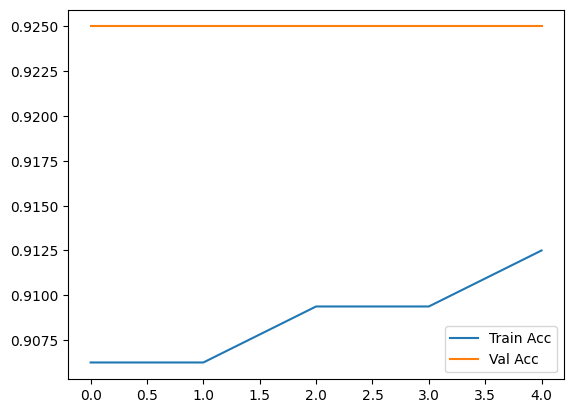

In [28]:
plt.plot(history.history['accuracy'], label='Train Acc')
plt.plot(history.history['val_accuracy'], label='Val Acc')
plt.legend()

In [29]:
model = Sequential()

model.add(Dense(10,activation='relu',input_dim=2))
model.add(Dense(10,activation='relu'))
model.add(Dense(1,activation='sigmoid'))

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [30]:
model.compile(loss='binary_crossentropy',metrics=['accuracy'])
#start = time.time()
history = model.fit(X_scaled,y,epochs=10,batch_size=250,validation_split=0.2)
#print(time.time() - start)

Epoch 1/10
2/2 ━━━━━━━━━━━━━━━━━━━━ 2s 628ms/step - accuracy: 0.3672 - loss: 0.7066 - val_accuracy: 0.5000 - val_loss: 0.6043
Epoch 2/10
2/2 ━━━━━━━━━━━━━━━━━━━━ 1s 74ms/step - accuracy: 0.4372 - loss: 0.6957 - val_accuracy: 0.5500 - val_loss: 0.6017
Epoch 3/10
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 122ms/step - accuracy: 0.4803 - loss: 0.6887 - val_accuracy: 0.5750 - val_loss: 0.6007
Epoch 4/10
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 112ms/step - accuracy: 0.5180 - loss: 0.6838 - val_accuracy: 0.5875 - val_loss: 0.5977
Epoch 5/10
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 79ms/step - accuracy: 0.5962 - loss: 0.6747 - val_accuracy: 0.6000 - val_loss: 0.5951
Epoch 6/10
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 77ms/step - accuracy: 0.6184 - loss: 0.6708 - val_accuracy: 0.6000 - val_loss: 0.5938
Epoch 7/10
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 78ms/step - accuracy: 0.6452 - loss: 0.6679 - val_accuracy: 0.6125 - val_loss: 0.5923
Epoch 8/10
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 83ms/step - accuracy: 0.6848 - loss: 0.6628 - val_accuracy: 0.6500 - val_loss: 0.59

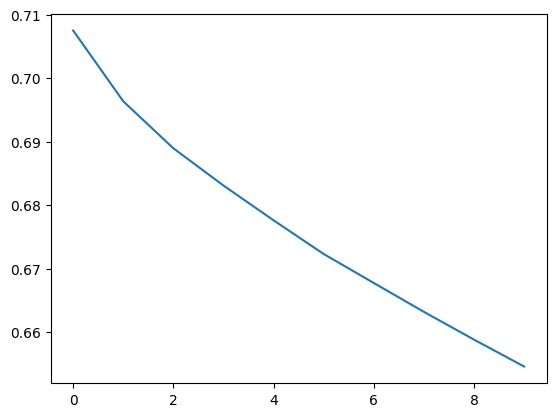

In [31]:
plt.plot(history.history['loss'])